In [5]:
import pandas as pd
import ujson
import json
import constants
import pickle as pckl
json_surah_words = 'json-surah-words/'

In [4]:
# surah_df = pd.read_json(json_surah_words + '1.json')
# for i in range(2, 115):
#     cur_df = pd.read_json(json_surah_words + str(i) + '.json')
#     surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
#     print(len(surah_df))
    
# fh = open("surah_df.pckl","wb")
# pckl.dump(surah_df, fh)
# fh.close()
# surah_df

ValueError: Expected object or value

In [6]:
fh = open("surah_df.pckl","rb")
surah_df = pckl.load(fh)
fh.close()
surah_df.head(5)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,rootWordType,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,nominal,1007002,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,triliteral root,1001002,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,triliteral root,1002002,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,True,1,الْحَمْدُ,787905890794,ح م د,352,triliteral root,1002001,1,al-ḥamdu,حَمْد,False,43,ḥamd,Noun,1
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,True,2,الدِّينِ,335755371025,د ي ن,498,triliteral root,1004003,1,l-dīni,دِين,False,92,dīn,Noun,3


In [7]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['waznEnglish', 'waznFreq', 'waznTlit']].copy(deep=True)

df['waznFreq'].hist(bins=100)

In [8]:
import numpy as np
df = df.sort_values(by='waznFreq', ascending=False)
df = df.drop_duplicates(['waznTlit', 'waznFreq'])
df["waznId"] = df["waznTlit"] + df["waznFreq"].astype(str)

In [9]:
df['row'] = np.arange(float(len(df)))
df['level'] = (np.ceil(df['row'] / 50) * 50) / 50
df['level'] = df['level'].astype(int)
df.head()

,waznEnglish,waznFreq,waznTlit,waznId,row,level
16775,Allah,2699,allah,allah2699,0.0,0
33368,to say,1618,qāla,qāla1618,1.0,1
13563,"who, which, that",1464,alladhī,alladhī1464,2.0,1
50158,to be,1358,kāna,kāna1358,3.0,1
47691,False,975,rabb,rabb975,4.0,1


In [10]:
levels=df[['waznId', 'level']].copy(deep=True)
t1=levels.head()

In [11]:
surah_df['waznId'] = surah_df["waznTlit"] + surah_df["waznFreq"].astype(str)
t2=surah_df.head()

In [12]:
t1

,waznId,level
16775,allah2699,0
33368,qāla1618,1
13563,alladhī1464,1
50158,kāna1358,1
47691,rabb975,1


In [13]:
t2

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,...,1007002,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2,alladhī1464
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,...,1001002,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,...,1002002,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,True,1,الْحَمْدُ,787905890794,ح م د,352,...,1002001,1,al-ḥamdu,حَمْد,False,43,ḥamd,Noun,1,ḥamd43
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,True,2,الدِّينِ,335755371025,د ي ن,498,...,1004003,1,l-dīni,دِين,False,92,dīn,Noun,3,dīn92


In [14]:
swl = surah_df.merge(levels).copy(deep=True)

swl = swl.drop_duplicates(['waznId', 'tlit', 'waznEnglish', 'question'])
swl = swl.drop_duplicates(['tlit'])
len(swl)

16860

In [15]:
# swl['row'] = np.arange(float(len(swl)))
# swl['level'] = (np.ceil(swl['row'] / 300) * 300) / 300
# swl['level'] = swl['level'].astype(int)
# swl

In [16]:
swl[['question_id', 'level']]
output = swl.groupby('level').question_id.apply(lambda x: ','.join(map(str, x))).reset_index()
output.loc[:,'question_id'] = output.loc[:, 'question_id'].apply(lambda x: [int(y) for y in x.split(",")])
# levels_dict = output.set_index('level').to_dict()
# levels_dict
output.head()

,level,question_id
0,0,"[748891323231, 338108719184, 450584991756, 598..."
1,1,"[981575111091, 473948883419, 458509331686, 699..."
2,2,"[335755371025, 988120768392, 274108006826, 533..."
3,3,"[507476513131, 169478867581, 51912417510, 8081..."
4,4,"[917721248071, 771908300179, 992866969132, 463..."


In [17]:
levels_dict = []
for index, row in output.iterrows():
    levels_dict.append({"level": row['level'], "question_ids": row['question_id']})
levels_dict

[{'level': 0,
  'question_ids': [748891323231,
   338108719184,
   450584991756,
   598559338691,
   738355908341,
   233574141326,
   465993455962,
   354358718651,
   82882992847,
   30486700262,
   263568533340,
   468630343766,
   944019897074,
   419465861240,
   433171436329,
   117074569950,
   414913740930]},
 {'level': 1,
  'question_ids': [981575111091,
   473948883419,
   458509331686,
   69969167303,
   739490398473,
   261295655088,
   719932682302,
   267485561144,
   415926204267,
   935439216145,
   821349925785,
   976676393413,
   114384609850,
   43669736108,
   994200549253,
   503702909404,
   760724506557,
   478683408415,
   7509048050,
   80987904039,
   195700322189,
   475224470552,
   826480013142,
   532665750958,
   508649672593,
   299889479841,
   55346067999,
   420700013113,
   177034988957,
   575571815913,
   10222845287,
   407518146267,
   594510488272,
   444459760389,
   220215995919,
   675640813912,
   391463320503,
   149523160105,
   185556844

In [18]:
import ujson
with open("outputs/wazn_levels_v9.json", 'w') as f:
    ujson.dump(levels_dict, f, ensure_ascii=False, indent=4)

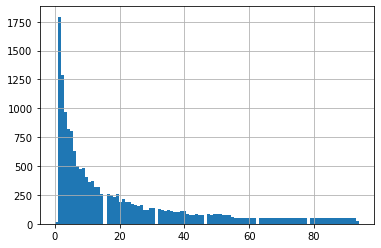

In [19]:
swl['level'].hist(bins=100)

In [20]:
len(swl)

16860

In [21]:
swl = swl.drop_duplicates(['tlit'])
len(swl)

16860